In [1]:
#Setting the folder where you work on.
import os
import csv
import json
import pandas as pd
import glob
from google.colab import drive
drive.mount('/content/drive')
!mkdir -p '/content/drive/MyDrive/Data_Glacier_Data_Analyst_2024/week5'
%cd '/content/drive/MyDrive/Data_Glacier_Data_Analyst_2024/week5'

Mounted at /content/drive
/content/drive/MyDrive/Data_Glacier_Data_Analyst_2024/week5


In [2]:
import numpy as np
import pandas as pd

In [3]:
df_test = pd.read_csv(r"/content/drive/MyDrive/Data_Glacier_Data_Analyst_2024/week5/test.csv", encoding='utf-8')
df_train = pd.read_csv(r"/content/drive/MyDrive/Data_Glacier_Data_Analyst_2024/week5/train.csv", encoding='utf-8')

In [4]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
df_test.head(50)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [6]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
test = df_test.copy()
train = df_train.copy()

In [8]:
#To avoid warning messages
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

#Classification model
from sklearn.linear_model import LogisticRegression

#Classification model evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#To split the model into training and testing data
from sklearn.model_selection import train_test_split

#Different model improvement packages
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Evaluation metrics
from sklearn import metrics

In [9]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [11]:
train.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [12]:
test.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,int64
LoanAmount,float64
Loan_Amount_Term,float64


In [13]:
train.shape,test.shape

((614, 13), (367, 12))

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [16]:
train['Loan_Status'].value_counts(normalize=True)

,proportion
Loan_Status,
Y,0.687296
N,0.312704


In [17]:
train.nunique()

,0
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


Check Missing Value  

In [18]:
train.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [19]:
#Creating variables that stores all numeric and object columns
numeric_col= train.select_dtypes([int,float]).columns
object_col= train.select_dtypes([object]).columns
print('object columns: ', object_col)
print('numeric columns:' , numeric_col)

object columns:  Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')
numeric columns: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [20]:
#Inputing the missing numeric data with mean value
for i in train[numeric_col]:
    print(i,':' ,round(train[i].mean(),2))
    train[i].fillna(round(train[i].mean(),2),inplace=True)

ApplicantIncome : 5403.46
CoapplicantIncome : 1621.25
LoanAmount : 146.41
Loan_Amount_Term : 342.0
Credit_History : 0.84


In [21]:
train.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [22]:
#Imputing object data with mode
for i in train[object_col]:
    print(i,':', train[i].mode()[0])
    train[i].fillna(train[i].mode()[0],inplace=True)

Loan_ID : LP001002
Gender : Male
Married : Yes
Dependents : 0
Education : Graduate
Self_Employed : No
Property_Area : Semiurban
Loan_Status : Y


In [23]:
train.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [24]:
train['Dependents'] = train['Dependents'].replace('3+', 3)

In [25]:
#Converting dependents into int as it includes integer values
train['Dependents']=train['Dependents'].astype('int')

In [26]:
#Mapping the object columns to convert it into binary from and then change the data type to int
train['Married']=train['Married'].map({'Yes':1, 'No':0})
train['Education']=train['Education'].map({'Graduate':1, 'Not Graduate':0})
train['Self_Employed']=train['Self_Employed'].map({'Yes':1, 'No':0})
train['Loan_Status']=train['Loan_Status'].map({'Y':1, 'N':0})

In [27]:
train.drop('Loan_ID',axis=1, inplace=True)

In [28]:
train=pd.get_dummies(train)
train.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1,0,5849,0.0,146.41,360.0,1.0,1,False,True,False,False,True
1,1,1,1,0,4583,1508.0,128.00,360.0,1.0,0,False,True,True,False,False
2,1,0,1,1,3000,0.0,66.00,360.0,1.0,1,False,True,False,False,True
3,1,0,0,0,2583,2358.0,120.00,360.0,1.0,1,False,True,False,False,True
4,0,0,1,0,6000,0.0,141.00,360.0,1.0,1,False,True,False,False,True


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Married                  614 non-null    int64  
 1   Dependents               614 non-null    int64  
 2   Education                614 non-null    int64  
 3   Self_Employed            614 non-null    int64  
 4   ApplicantIncome          614 non-null    int64  
 5   CoapplicantIncome        614 non-null    float64
 6   LoanAmount               614 non-null    float64
 7   Loan_Amount_Term         614 non-null    float64
 8   Credit_History           614 non-null    float64
 9   Loan_Status              614 non-null    int64  
 10  Gender_Female            614 non-null    bool   
 11  Gender_Male              614 non-null    bool   
 12  Property_Area_Rural      614 non-null    bool   
 13  Property_Area_Semiurban  614 non-null    bool   
 14  Property_Area_Urban      6

Model Building

In [30]:
#Spliting the dataset into features and target
x=train.drop('Loan_Status',axis=1)
y=train['Loan_Status']

In [31]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.25,stratify=y)

**Logistic Regression**

In [32]:
#try logistic regression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [33]:
ypred=lr.predict(xtest)
print(accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

0.8116883116883117
[[ 22  26]
 [  3 103]]
              precision    recall  f1-score   support

           0       0.88      0.46      0.60        48
           1       0.80      0.97      0.88       106

    accuracy                           0.81       154
   macro avg       0.84      0.72      0.74       154
weighted avg       0.82      0.81      0.79       154



In [34]:
kf=StratifiedKFold(n_splits=5, random_state=1, shuffle= True)
i=1
for train_index,test_index in kf.split(x,y):
    global model
    print('{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=x.iloc[train_index],x.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('Accuracy score: ', score)
    i+=1
    pred_test =model.predict(xtest)
    pred= model.predict_proba(xvl)[:,1]



1 of kfold 5
Accuracy score:  0.7967479674796748
2 of kfold 5
Accuracy score:  0.8211382113821138
3 of kfold 5
Accuracy score:  0.7967479674796748
4 of kfold 5
Accuracy score:  0.8211382113821138
5 of kfold 5
Accuracy score:  0.7950819672131147


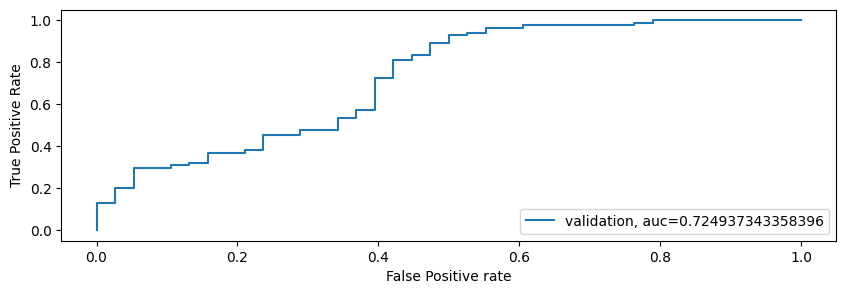

In [35]:
fpr,tpr,_=metrics.roc_curve(yvl,pred)
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(10,3))
plt.plot(fpr,tpr,label='validation, auc='+str(auc))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

**RandomForestClassifier**

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Adjust the class weight (auto-adjustment of the class weight with setting as 'balanced')
model = RandomForestClassifier(class_weight='balanced')

# learning the model
model.fit(xtrain, ytrain)

# predict
y_pred = model.predict(xtest)

In [37]:
y_pred=model.predict(xtest)
print(accuracy_score(ytest,y_pred))
print(confusion_matrix(ytest,y_pred))
print(classification_report(ytest,y_pred))

0.8311688311688312
[[ 25  23]
 [  3 103]]
              precision    recall  f1-score   support

           0       0.89      0.52      0.66        48
           1       0.82      0.97      0.89       106

    accuracy                           0.83       154
   macro avg       0.86      0.75      0.77       154
weighted avg       0.84      0.83      0.82       154



In [38]:
# get the possibility of prediction
y_pred_prob = model.predict_proba(xtest)[:, 1]
print(y_pred_prob)

# set the threshold = 0.3
threshold = 0.3
y_pred_adjusted = (y_pred_prob > threshold).astype(int)
print(y_pred_adjusted)

[0.23 0.67 0.77 0.97 0.44 0.78 0.27 0.22 0.91 0.98 0.97 0.25 0.98 0.87
 0.87 0.8  0.87 0.76 0.78 0.64 0.9  0.95 0.49 0.82 0.41 0.68 0.07 0.93
 0.65 0.62 0.8  0.19 0.18 0.66 0.66 0.78 0.7  0.69 0.85 0.82 0.85 0.89
 0.84 0.55 0.75 0.39 0.26 0.67 0.75 0.89 0.83 0.86 0.89 0.59 0.82 0.83
 0.5  0.06 0.81 0.48 0.63 0.82 0.82 0.88 0.81 0.38 0.62 0.77 0.75 0.9
 0.85 0.5  1.   0.99 0.95 0.24 0.07 0.9  0.54 0.85 0.78 0.72 0.78 0.77
 0.8  0.78 0.94 0.5  0.54 0.15 0.54 0.87 0.94 0.86 0.53 0.7  0.3  0.08
 0.49 0.72 0.1  0.63 0.13 0.66 0.9  0.79 0.81 0.82 0.68 0.74 0.88 0.2
 0.8  0.73 0.69 0.96 0.93 0.77 0.79 0.86 0.8  0.84 0.62 0.65 0.38 0.54
 0.61 0.59 0.52 0.93 0.9  0.74 0.54 0.97 0.85 0.81 0.28 0.89 0.78 0.8
 0.6  0.61 0.94 0.81 0.49 0.88 0.8  0.84 0.18 0.78 0.19 0.73 0.97 0.94]
[0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 

In [39]:
# evaluation
print("Confusion Matrix:")
print(confusion_matrix(ytest, y_pred_adjusted))

print("\nClassification Report:")
print(classification_report(ytest, y_pred_adjusted))

Confusion Matrix:
[[ 18  30]
 [  2 104]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.38      0.53        48
           1       0.78      0.98      0.87       106

    accuracy                           0.79       154
   macro avg       0.84      0.68      0.70       154
weighted avg       0.81      0.79      0.76       154



**XG boost**

In [38]:
import xgboost as xgb

# Set parameters according to the objective function (binary:logistic is for two-class classification)
params = {
    'objective': 'binary:logistic',
    'scale_pos_weight': 1.0,  # Set weights based on positive/negative class imbalance
    'eval_metric': 'logloss'
}

# learning model_xg
model_xg = xgb.XGBClassifier(**params)
model_xg.fit(xtrain, ytrain)

# prediction
y_pred = model_xg.predict(xtest)

In [39]:
y_pred=model_xg.predict(xtest)
print(accuracy_score(ytest,y_pred))
print(confusion_matrix(ytest,y_pred))
print(classification_report(ytest,y_pred))

0.8441558441558441
[[ 29  19]
 [  5 101]]
              precision    recall  f1-score   support

           0       0.85      0.60      0.71        48
           1       0.84      0.95      0.89       106

    accuracy                           0.84       154
   macro avg       0.85      0.78      0.80       154
weighted avg       0.85      0.84      0.84       154



**Hyper parameter tuning**

In [40]:

y_pred_prob = model_xg.predict_proba(xtest)[:, 1]

# set the threshold = 0.6
threshold = 0.4
y_pred_adjusted = (y_pred_prob > threshold).astype(int)

# evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(ytest, y_pred_adjusted))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred_adjusted))
print("Classification Report:\n", classification_report(ytest, y_pred_adjusted))

Accuracy: 0.8246753246753247
Confusion Matrix:
 [[ 26  22]
 [  5 101]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.54      0.66        48
           1       0.82      0.95      0.88       106

    accuracy                           0.82       154
   macro avg       0.83      0.75      0.77       154
weighted avg       0.83      0.82      0.81       154



In [41]:
import pickle

In [42]:
# Saving model to disk
pickle.dump(model_xg, open('model.pkl','wb'))

In [43]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[1, 2, 1, 0, 6000, 500, 100.01, 360, 1.0, 0, 1, 0, 0, 1]]))

[1]


In [44]:
print(model.predict([[1, 2, 1, 0, 6000, 500, 100.01, 360, 1.0, 0, 1, 0, 0, 1]]))

[1]
